## 一、贝叶斯优化举例

In [1]:
from bayes_opt import BayesianOptimization
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
def target(x):
    return -(np.exp(-(x - 2)**2) + np.exp(-(x - 6)**2/10) + 1/ (x**2 + 1))

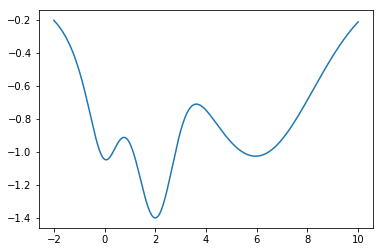

In [3]:
x = np.linspace(-2, 10, 1000).reshape(-1, 1)
y = target(x)

plt.plot(x, y)

In [4]:
bo = BayesianOptimization(target, {'x': (1, 10)})
#bo.maximize(init_points=2, n_iter=0, acq='ucb', kappa=5)
bo.maximize(init_points=1, n_iter=0)

Initialization
-----------------------------------------
 Step |   Time |      Value |         x | 
    1 | 00m00s |   -0.98401 |    6.6247 | 
Bayesian Optimization
-----------------------------------------
 Step |   Time |      Value |         x | 


In [5]:
print((bo.X, bo.Y))

(array([[6.62467372]]), array([-0.98400833]))


In [7]:
bo.gp.fit(bo.X, bo.Y)
mu = bo.gp.predict(x)
mu

array([-5.97890642e-07, -6.12583877e-07, -6.27636109e-07, -6.43056053e-07,
       -6.58852633e-07, -6.75034988e-07, -6.91612476e-07, -7.08594683e-07,
       -7.25991423e-07, -7.43812749e-07, -7.62068953e-07, -7.80770578e-07,
       -7.99928416e-07, -8.19553524e-07, -8.39657220e-07, -8.60251097e-07,
       -8.81347027e-07, -9.02957164e-07, -9.25093957e-07, -9.47770153e-07,
       -9.70998806e-07, -9.94793282e-07, -1.01916727e-06, -1.04413478e-06,
       -1.06971017e-06, -1.09590814e-06, -1.12274374e-06, -1.15023236e-06,
       -1.17838981e-06, -1.20723222e-06, -1.23677615e-06, -1.26703854e-06,
       -1.29803674e-06, -1.32978850e-06, -1.36231202e-06, -1.39562592e-06,
       -1.42974927e-06, -1.46470159e-06, -1.50050287e-06, -1.53717359e-06,
       -1.57473471e-06, -1.61320768e-06, -1.65261448e-06, -1.69297761e-06,
       -1.73432010e-06, -1.77666555e-06, -1.82003809e-06, -1.86446247e-06,
       -1.90996399e-06, -1.95656857e-06, -2.00430276e-06, -2.05319372e-06,
       -2.10326927e-06, -

In [ ]:
plt.plot(x, mu)

In [ ]:
bo.gp.predict(2.5)

## 二、高斯过程回归 (GPR)

### 2.1 从随机变量到随机向量
2.1.1. 随机变量 $X$ 是定义在概率空间 $(\Omega,F,P)$ 上的映射。     
即 $X:(\Sigma{\rightarrow}R),R\in[-\infty,+\infty]$ 其中，  
$\omega:$ 样本  
$\Omega:$ 样本空间  
$\Sigma:$ 事件 $\Sigma=\{\omega|\omega\in\Omega\}$     
$F:$ 事件集合 $F=\{\Sigma|\Sigma\subset\Omega\}$，满足$\sigma$代数  
$P:$ 事件发生概率 $P:(F{\rightarrow}R),R\in[0,1]$  
 
2.1.2. 考虑概率空间集合 $\{(\Omega^1,F,P^1)$...$(\Omega^t,F,P^t)\}$ 则 $\vec{X}=[X^1, X^2 ... X^t|\vec{T}]$ 是随机向量。

### 2.2 随机过程和联合分布
2.2.1. $\vec{X}$ 可以看作一个函数 $F(\omega^t|\vec{T})=\vec{X(\omega^t)}$，则 $F(\omega^t,\vec{T})$ 可表示随机过程。  
2.2.2. $P(X^1 ... X^t|\vec{T})$ 就是联合分布。  
2.2.3. $F(t|X^1 ... X^t)$ 就是关于 $t$ 的函数。

### 2.3 联合高斯分布和高斯过程
根据 2.2.1、2.2.2 如果 $P(X^1 ... X^t|\vec{T}) \sim N(\mu^t, K)$ 满足联合高斯分布，则 $F(\omega^t,\vec{T})$ 是高斯过程 $GP$。

### 2.4理解多维高斯分布

$\sum_{i=0}^N\int_{a}^{b}g(t,i)\text{d}t$

$\begin{bmatrix}
{a_{11}}&{a_{12}}&{\cdots}&{a_{1n}}\\
{a_{21}}&{a_{22}}&{\cdots}&{a_{2n}}\\
{\vdots}&{\vdots}
&{\ddots}&{\vdots}\\
{a_{m1}}&{a_{m2}}&{\cdots}&{a_{mn}}\\
\end{bmatrix}$

In [ ]:
$\sum_{i=0}^N\int_{a}^{b}g(t,i)\text{d}t$

$\begin{bmatrix}
{a_{11}}&{a_{12}}&{\cdots}&{a_{1n}}\\
{a_{21}}&{a_{22}}&{\cdots}&{a_{2n}}\\
{\vdots}&{\vdots}
&{\ddots}&{\vdots}\\
{a_{m1}}&{a_{m2}}&{\cdots}&{a_{mn}}\\
\end{bmatrix}$